<a href="https://colab.research.google.com/github/Fuenfgeld/DatamanagementAndArchiving/blob/main/SQLTutorial/SQLL%C3%B6sung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python SQLite Guide






In [ ]:
# import libraries
import sqlite3
from sqlite3 import Error

In [ ]:
# # mount drive to access data
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
# material_path = "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material"

In [ ]:
# !ls "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material/source_dbs"

##  DataBase Connection





In [ ]:
# SQLite connection
def create_connection_memory():
    """ create a database connection to a database that resides
        in the memory
    """
    conn = None;
    try:
       #Establishing the connection
        conn = sqlite3.connect(':memory:')
        return conn
        print(sqlite3.version)
    except Error as e:
        print("Error while connecting to sqlite", e)
    # finally:
    #     if conn:
    #         conn.close()

In [ ]:
# Creating a temporary empty database in the memory.
conn = create_connection_memory()
# Creating a cursor object using the cursor() method
cur = conn.cursor()
print("Successfully Connected to SQLite")


Successfully Connected to SQLite


##Create Table

```
CREATE TABLE database_name.table_name(
    column1 datatype PRIMARY KEY(one or more columns),
    column2 datatype,
    column3 datatype,
    .....
    columnN datatype
);
```

Statements:
* CREATE TABLE
* Data type
* Primary Key
* Constraints
* Foreign key
* IF NOT EXISTS 

In [ ]:
#  sql query to create patients_info table with Primary key, NOT NULL & UNIQUE CONSTRAINTS statements
create_patients_info = """CREATE TABLE patients_info (
                           Id INTEGER PRIMARY KEY,
                           BIRTHDATE DATE,
                           FIRST VARCHAR(255) NOT NULL,
                           LAST VARCHAR(255) NOT NULL,                                     
                           MARITAL TEXT,
                           GENDER STRING,
                           SALARY REAL DEFAULT 1000.00,
                           EMAIL TEXT NOT NULL UNIQUE);"""

# execute query
cur.execute(create_patients_info)    
# Commit your changes in the database
conn.commit()             
print("SQLite table created")

SQLite table created


In [ ]:
 # sql query to create procedures table with Foreign Key, if not exists and DEFAULT CONSTRAINT statements
create_procedures_info = """CREATE TABLE IF NOT EXISTS procedures_info (
                           PATIENTID INTEGER,
                           SNOMEDCT_CODE INTEGER NOT NULL,
                           DESCRIPTION STRING,
                           BASE_COST REAL DEFAULT 50000.00,
                           FOREIGN KEY (PATIENTID)
                              REFERENCES patients_info (Id) 
                       );"""
cur.execute(create_procedures_info)
conn.commit()
print("SQLite table created")

SQLite table created


In [ ]:
# sql query to create medications_info table with Foreign Key and if not exists statements
create_medications_info = """CREATE TABLE IF NOT EXISTS medications_info (
                           START DATE,
                           STOP DATE,
                           PATIENTID INTEGER,
                           CODE STRING,
                           DESCRIPTION STRING,
                           TOTALCOST INTEGER,
                           REASONCODE STRING,
                           FOREIGN KEY (PATIENTID)
                              REFERENCES patients_info (Id)                            
                       );"""

cur.execute(create_medications_info)
conn.commit()
print("SQLite table created")

SQLite table created


## Insert Data
```
INSERT INTO TABLE_NAME (column1, column2, column3,...columnN)
            VALUES (value1, value2, value3,...valueN);
```

In [ ]:
# Insert with specifying column names
cur.execute("INSERT INTO patients_info (Id, BIRTHDATE, FIRST, LAST, MARITAL, GENDER, EMAIL) VALUES (1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 'Emmie8@sqlite.net')")
cur.execute("INSERT INTO patients_info (Id, BIRTHDATE, FIRST, LAST, MARITAL, GENDER, EMAIL) VALUES (1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 'Emmie9@sqlite.net')")
cur.execute("INSERT INTO patients_info (Id, BIRTHDATE, FIRST, LAST, MARITAL, GENDER, EMAIL) VALUES (1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 'Emmie10@sqlite.net')")
cur.execute("INSERT INTO patients_info (Id, FIRST, LAST, GENDER, EMAIL) VALUES (1029, 'Mary', 'Schoen', 'F', 'mary@sqlite.net')")


In [ ]:
# Insert without specifying the column names
cur.execute("INSERT INTO patients_info VALUES (1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F',2000, 'Emily@sqlite.net')")


In [ ]:
# insert into table-Larger example- multiple rows
rows = [(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M' , 1500, 'Stroman228@sqlite.net'),
        (157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M' , 400, 'Krajcik437@sqlite.net'),
        (765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M' , 566, 'Valencia279@sqlite.net'),
        (357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S' ,'F', 7000, 'Schamberger479@sqlite.net'),
        (123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000,'Marvin195@sqlite.net')]
# Preparing SQL queries to INSERT  records into the database.
cur.executemany('insert into patients_info values(?,?,?,?,?,?,?,?)', rows)
conn.commit()

In [ ]:
# insert into table-Larger example
rows = [(17, 73761001, 'Colonoscopy', 9209.61),
        (17, 430193006, 'Medication Reconciliation (procedure)', 414.03),
        (17, 73761001, 'Colonoscopy', 13437.13),
        (1027, 23426006, 'Measurement of respiratory function (procedure)', 334.63),
        (398, 430193006, 'Medication Reconciliation (procedure)', 626.56),
        (157, 261352009, 'Face mask (physical object)', 3.8),
        (768, 127783003, 'Spirometry (procedure)', 9285.07),
        (765, 430193006, 'Medication Reconciliation (procedure)', 548.9),
        (357, 430193006, 'Medication Reconciliation (procedure)', 518.09),
        (357, 430193006, 'Medication Reconciliation (procedure)', 496.22)]


cur.executemany('insert into procedures_info values(?,?,?,?)', rows)
conn.commit()

In [ ]:
# Insert into table-Larger example
rows = [('1946-01-11T11:40:19Z', '', 17, 1049630, 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 8016.8, ''),
        ('2010-01-20T00:48:18Z', '2010-10-20T00:48:18Z', 17, 314076, 'lisinopril 10 MG Oral Tablet', 5.46, 59621000),
        ('2010-02-19T00:48:18Z', '2010-10-20T00:48:18Z', 27, 310798, 'Hydrochlorothiazide 25 MG Oral Tablet', 0.08, 59621000),
        ('2010-04-20T00:48:18Z', '2010-10-20T00:48:18Z', 123, 308136, 'amLODIPine 2.5 MG Oral Tablet', 3.66, 59621000),
        ('2010-10-20T00:48:18Z', '2010-12-15T00:48:18Z', 123, 310798, 'Hydrochlorothiazide 25 MG Oral Tablet', 0.01, 59621000),
        ('2010-10-20T00:48:18Z', '2010-12-15T00:48:18Z', 157, 314076, 'lisinopril 10 MG Oral Tablet', 1.12, 59621000),
        ('2010-10-20T00:48:18Z', '2010-12-15T00:48:18Z', 157, 308136, 'amLODIPine 2.5 MG Oral Tablet', 1.12, 59621000),
        ('2000-01-07T08:03:01Z', '2001-01-12T08:03:01Z', 157, 308136, 'amLODIPine 2.5 MG Oral Tablet', 7.42, 59621000),
        ('2001-01-12T08:03:01Z', '2002-01-18T08:03:01Z', 357, 308136, 'amLODIPine 2.5 MG Oral Tablet', 7.42, 59621000),
        ('2002-01-18T08:03:01Z', '2003-01-24T08:03:01Z', 765, 308136, 'amLODIPine 2.5 MG Oral Tablet', 7.42, 59621000)]


cur.executemany('insert into medications_info values(?,?,?,?,?,?,?)', rows)
conn.commit()

## Select Data

# Exercise 1

In [ ]:
# Retrieve all the column of each records from the table patients_info
selectQueryEx1 = "SELECT * FROM patients_info" #<- insert your Select here between the "" signs
cur.execute(selectQueryEx1)
records = cur.fetchall()
print("Total rows in table: ", len(records))
for row in records:
  print(row)

Total rows in table:  10
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net')
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net')
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net')
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net')
(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net')
(1029, None, 'Mary', 'Schoen', None, 'F', 1000.0, 'mary@sqlite.net')


In [ ]:
# show table: retrieve all the column of each records and 4 rows
cur.execute("SELECT * FROM procedures_info")
records = cur.fetchall()
# show 4 rows
for row in records[:4]:
  print(row)


(17, 73761001, 'Colonoscopy', 9209.61)
(17, 430193006, 'Medication Reconciliation (procedure)', 414.03)
(17, 73761001, 'Colonoscopy', 13437.13)
(1027, 23426006, 'Measurement of respiratory function (procedure)', 334.63)


In [ ]:
# List of columns in a table
cur.execute ("select * from patients_info")
col_names = cur.description
for row in col_names:
  print(row[0])


Id
BIRTHDATE
FIRST
LAST
MARITAL
GENDER
SALARY
EMAIL


# Exercise 2

In [ ]:
# select the following columns Id, FIRST, LAST and SALARY from the patients_info table
selectQueryEx2 = "SELECT Id, FIRST, LAST, SALARY FROM patients_info" #<- insert your Select here between the "" signs
cur.execute(selectQueryEx2)
records = cur.fetchall()
for row in records:
  print(row)

(17, 'Karl184', 'Stroman', 1500.0)
(123, 'Jamison785', 'Schoen', 9000.0)
(157, 'Monty345', 'Krajcik', 400.0)
(357, 'Hayley136', 'Schamberger479', 7000.0)
(765, 'Hugo693', 'Valencia279', 566.0)
(1025, 'Emmie', 'Stroman', 1000.0)
(1026, 'Emmie', 'Schoen', 1000.0)
(1027, 'Emmie', 'Krajcik', 1000.0)
(1028, 'Emily', 'Schoen', 2000.0)
(1029, 'Mary', 'Schoen', 1000.0)


#Exercise 3

the sqlite_master table is a table that contains most relevant metadata information abaout a sqlite database. 
https://sqlite.org/schematab.html



In [ ]:
# write an SQL query that selects all the tables that are present in the sqlite database
selectQueryEx3 = "SELECT name FROM sqlite_master WHERE type='table';" #<- insert your Select here between the "" signs
cur.execute(selectQueryEx3)
print(cur.fetchall())

[('patients_info',), ('procedures_info',), ('medications_info',)]


In [ ]:
# Change DATE 
cur.execute("select *, DATE(BIRTHDATE, '+2 year') AS two_years_old from patients_info")
records = cur.fetchall()
for row in records:
  print(row)

(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', '1961-05-31')
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', '1953-12-14')
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', '1993-11-27')
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', '1943-12-22')
(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net', '2003-11-18')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net', '1947-04-17')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net', '1947-04-17')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net', '1947-04-17')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net', '1947-04-17')
(1029, None, 'Mary', 'Schoen', None, 'F', 1000.0, 'mary@sqlite.net', None)


In [ ]:
# concatenate two strings
cur.execute("SELECT ID, FIRST || ' ' || LAST FROM patients_info")
records = cur.fetchall()
for row in records:
  print(row)

(17, 'Karl184 Stroman')
(123, 'Jamison785 Schoen')
(157, 'Monty345 Krajcik')
(357, 'Hayley136 Schamberger479')
(765, 'Hugo693 Valencia279')
(1025, 'Emmie Stroman')
(1026, 'Emmie Schoen')
(1027, 'Emmie Krajcik')
(1028, 'Emily Schoen')
(1029, 'Mary Schoen')


## PRAGMA

# Exercise 4

sqlite hase a very usefull SQL extension to retrive Metadata about the database called PRAGMA. 
(https://www.sqlite.org/pragma.html)

*   Syntax


```
PRAGMA pragma_function(table); 
```


In [ ]:
# write a PRAGMA function call using the table_info pragma function to list the shema information of the  patients_info table
sqlEx4 = "PRAGMA table_info(patients_info);" #<- insert your statement here between the "" signs
cur.execute(sqlEx4)
data = cur.fetchall()
# print(data)
for d in data:
  print(d[0], d[1], d[2])

0 Id INTEGER
1 BIRTHDATE DATE
2 FIRST VARCHAR(255)
3 LAST VARCHAR(255)
4 MARITAL TEXT
5 GENDER STRING
6 SALARY REAL
7 EMAIL TEXT


## Count

In [ ]:
# count records(rows) in a table
cur.execute("SELECT count(*) FROM procedures_info")
print(cur.fetchall())


[(10,)]


## Where Clause
```
SELECt column1, column2, columnN
FROM table_name
WHERE [search_condition]
```

In [ ]:
# Retrieving specific records using the where clause: Female info
cur.execute("select * from patients_info where GENDER='F';")
records = cur.fetchall()
for row in records:
  print(row)


(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net')
(1029, None, 'Mary', 'Schoen', None, 'F', 1000.0, 'mary@sqlite.net')


In [ ]:
# Retrieving specific records using the where clause: who is born after specific date
cur.execute("select * from patients_info where BIRTHDATE>'2000-01-01';")
records = cur.fetchall()
for row in records:
  print(row)


(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net')


In [ ]:
# Retrieving specific records using the where clause:  who is born between two date
cur.execute("select * from patients_info where BIRTHDATE between '1945-01-01' and '1952-01-01';")
records = cur.fetchall()
for row in records:
  print(row)


(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net')


In [ ]:
# select with parameters
select_query = """select * from patients_info where id = ?"""
cur.execute(select_query, (17,))# row with id=17
records = cur.fetchall()
print("Printing ID ", id)
for row in records:
    print("Name = ", row[2]+ " " + row[3])
    print("Email  = ", row[6])
    print("BirthDate  = ", row[1])


Printing ID  <built-in function id>
Name =  Karl184 Stroman
Email  =  1500.0
BirthDate  =  1959-05-31


## Limit
```
SELECT column1, column2, columnN
FROM table_name
LIMIT [no of rows]
```

In [ ]:
# Retrieve limit number of records
cur.execute("SELECT * FROM medications_info LIMIT 3")
records = cur.fetchall()
# show all records
for row in records:
  print(row)

('1946-01-11T11:40:19Z', '', 17, 1049630, 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 8016.8, '')
('2010-01-20T00:48:18Z', '2010-10-20T00:48:18Z', 17, 314076, 'lisinopril 10 MG Oral Tablet', 5.46, 59621000)
('2010-02-19T00:48:18Z', '2010-10-20T00:48:18Z', 27, 310798, 'Hydrochlorothiazide 25 MG Oral Tablet', 0.08, 59621000)


## Group By
```
SELECT column-list
FROM table_name
WHERE [ conditions ]
GROUP BY column1, column2....columnN
ORDER BY column1, column2....columnN
```

In [ ]:
# If you want to know the number of people with the same LAST, then GROUP BY LAST
cur.execute("SELECT LAST, count(LAST) FROM patients_info GROUP BY LAST")
records = cur.fetchall()
for row in records:
  print(row)

('Krajcik', 2)
('Schamberger479', 1)
('Schoen', 4)
('Stroman', 2)
('Valencia279', 1)


In [ ]:
# If you want to know the total amount of salary on each FAMILY(same LAST), then GROUP BY LAST
cur.execute("SELECT LAST, SUM(SALARY) FROM patients_info GROUP BY LAST")
records = cur.fetchall()
for row in records:
  print(row)

('Krajcik', 1400.0)
('Schamberger479', 7000.0)
('Schoen', 13000.0)
('Stroman', 2500.0)
('Valencia279', 566.0)


## Having Clause
```
SELECT column1, column2
      FROM table1, table2
      WHERE [ conditions ]
      GROUP BY column1, column2
      HAVING [ conditions ]
      ORDER BY column1, column2
```

In [ ]:
# LAST name with frequency more than 1
cur.execute("SELECT LAST FROM patients_info GROUP BY LAST HAVING COUNT(LAST)>1")
records = cur.fetchall()
for row in records:
  print(row)

('Krajcik',)
('Schoen',)
('Stroman',)


## Alter
```
ALTER TABLE database_name.table_name ADD COLUMN column_def...;

```

In [ ]:
# Rename Table
cur.execute("ALTER TABLE procedures_info RENAME TO proc_info")
# list of tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())


[('patients_info',), ('proc_info',), ('medications_info',)]


In [ ]:
# Add new column with default value
cur.execute("ALTER TABLE patients_info ADD COLUMN COUNTRY VARCHAR(255) DEFAULT GERMANY")
# show table
cur.execute("SELECT * FROM patients_info")
records = cur.fetchall()
for row in records:
  print(row)

(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'GERMANY')
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', 'GERMANY')
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', 'GERMANY')
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', 'GERMANY')
(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net', 'GERMANY')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net', 'GERMANY')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net', 'GERMANY')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net', 'GERMANY')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net', 'GERMANY')
(1029, None, 'Mary', 'Schoen', None, 'F', 1000.0, 'mary@sqlite.net', 'GERMANY')


## DISTINCT
```
SELECT DISTINCT column1, column2,.....columnN 
FROM table_name
WHERE [condition]

```

In [ ]:
# Retrieve data with duplicate
cur.execute("SELECT FIRST FROM patients_info")
records = cur.fetchall()
for row in records:
  print(row)


('Karl184',)
('Jamison785',)
('Monty345',)
('Hayley136',)
('Hugo693',)
('Emmie',)
('Emmie',)
('Emmie',)
('Emily',)
('Mary',)


In [ ]:
# Retrieve data without duplicate
cur.execute("SELECT DISTINCT FIRST FROM patients_info")
records = cur.fetchall()
for row in records:
  print(row)


('Karl184',)
('Jamison785',)
('Monty345',)
('Hayley136',)
('Hugo693',)
('Emmie',)
('Emily',)
('Mary',)


## Order by
```
SELECT column-list
FROM table_name
[WHERE condition]
[ORDER BY column1, column2, .. columnN] [ASC | DESC];
```

In [ ]:
# order by a column in descending order
cur.execute("select * from patients_info order by BIRTHDATE DESC")
records = cur.fetchall()
for row in records:
  print(row)

(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net', 'GERMANY')
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', 'GERMANY')
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'GERMANY')
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', 'GERMANY')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net', 'GERMANY')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net', 'GERMANY')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net', 'GERMANY')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net', 'GERMANY')
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', 'GERMANY')
(1029, None, 'Mary', 'Schoen', None, 'F', 1000.0, 'mary@sqlite.net', 'GERMANY')


In [ ]:
# order by two columns in Ascending and Descending orders
cur.execute("select * from patients_info order by BIRTHDATE DESC, FIRST ASC")
records = cur.fetchall()
for row in records:
  print(row)

(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net', 'GERMANY')
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', 'GERMANY')
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'GERMANY')
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', 'GERMANY')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net', 'GERMANY')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net', 'GERMANY')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net', 'GERMANY')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net', 'GERMANY')
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', 'GERMANY')
(1029, None, 'Mary', 'Schoen', None, 'F', 1000.0, 'mary@sqlite.net', 'GERMANY')


## Update Table
```
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition]
```

In [ ]:
# update all records: COUNTRY
cur.execute("UPDATE patients_info SET COUNTRY='USA'")
print("Number of rows updated: {}".format(cur.rowcount))
records = cur.fetchall()
for row in records:
  print(row)

Number of rows updated: 10


In [ ]:
# update table using parameter
cur.execute("UPDATE patients_info SET Email=? WHERE id =?", ('update_mary@sqlite.com', 1029))
print("Number of rows updated: {}".format(cur.rowcount))

Number of rows updated: 1


In [ ]:
# after update
cur.execute("select * from patients_info")
records = cur.fetchall()
for row in records:
  print(row)

(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA')
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', 'USA')
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', 'USA')
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', 'USA')
(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net', 'USA')
(1025, '1945-04-17', 'Emmie', 'Stroman', 'M', 'F', 1000.0, 'Emmie8@sqlite.net', 'USA')
(1026, '1945-04-17', 'Emmie', 'Schoen', 'M', 'F', 1000.0, 'Emmie9@sqlite.net', 'USA')
(1027, '1945-04-17', 'Emmie', 'Krajcik', 'M', 'F', 1000.0, 'Emmie10@sqlite.net', 'USA')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net', 'USA')
(1029, None, 'Mary', 'Schoen', None, 'F', 1000.0, 'update_mary@sqlite.com', 'USA')



## Delete Data 
```
DELETE FROM table_name [Where Clause]

```
If you execute the DELETE statement without the WHERE clause all the records from the specified table will be deleted.

In [ ]:
# Delete rows that BIRTHDATE IS NULL
cur.execute("DELETE FROM patients_info WHERE (BIRTHDATE IS NULL OR BIRTHDATE='')")

In [ ]:
# Delete rows that first name srart with Emm
cur.execute("DELETE FROM patients_info WHERE FIRST LIKE 'Emm%' ")

In [ ]:
# Show table after Delete
cur.execute("select * from patients_info")
records = cur.fetchall()
for row in records:
  print(row)

(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA')
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', 'USA')
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', 'USA')
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', 'USA')
(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net', 'USA')
(1028, '1945-04-17', 'Emily', 'Schoen', 'M', 'F', 2000.0, 'Emily@sqlite.net', 'USA')


##Join
```
SELECT a1, a2, b1, b2
FROM A
INNER/LEFT JOIN B on B.f = A.f;
```

https://www.sqlitetutorial.net/sqlite-join/

# Exercise 5

A main feature of SQL databases is the joining of multiple tables

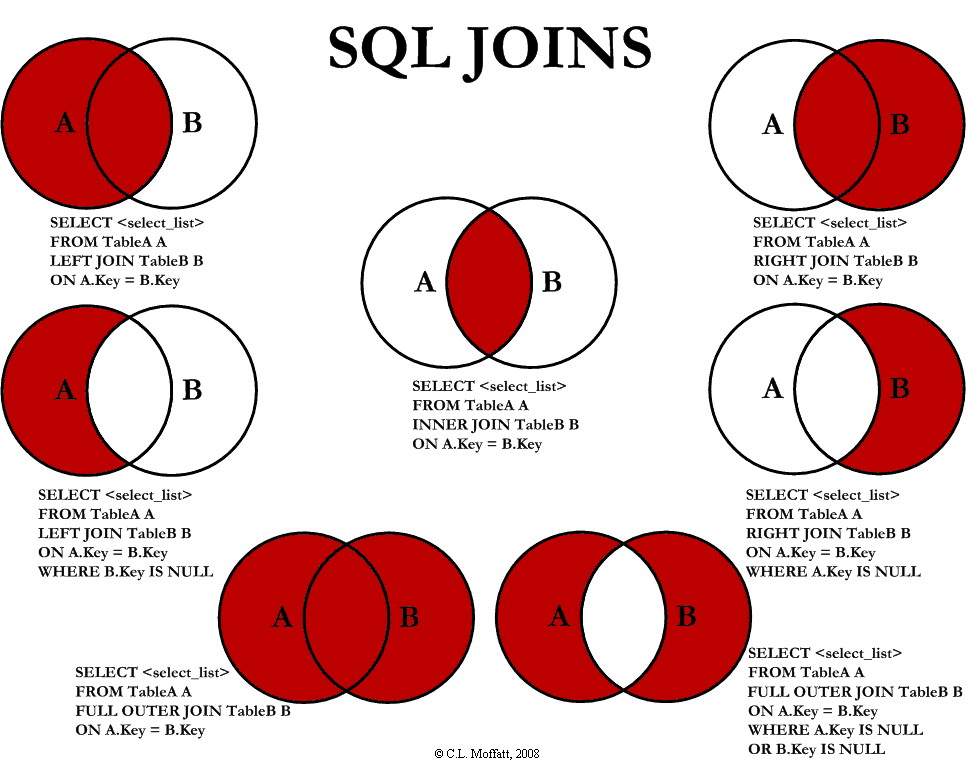

In [ ]:
# Write an INNER join Select. Join the tables proc_info on the PATIENTID column and patients_info on ID column. 
sqlEx5 = "SELECT * FROM patients_info as pt INNER JOIN  proc_info as pc ON pt.ID=pc.PATIENTID" #<- insert your Select here between the "" signs
cur.execute(sqlEx5)
records = cur.fetchall()
for row in records:
  print(row)

(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', 17, 73761001, 'Colonoscopy', 9209.61)
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', 17, 430193006, 'Medication Reconciliation (procedure)', 414.03)
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', 17, 73761001, 'Colonoscopy', 13437.13)
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', 'USA', 157, 261352009, 'Face mask (physical object)', 3.8)
(765, '2001-11-18', 'Hugo693', 'Valencia279', '', 'M', 566.0, 'Valencia279@sqlite.net', 'USA', 765, 430193006, 'Medication Reconciliation (procedure)', 548.9)
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', 'USA', 357, 430193006, 'Medication Reconciliation (procedure)', 518.09)
(357, '1941-12-22', 'Hayley136', 'Schamberger479', 'S', 'F', 7000.0, 'Schamberger479@sqlite.net', 'USA', 357, 430

In [ ]:
# Left Join
cur.execute("SELECt * FROM patients_info as pt LEFT JOIN medications_info as md ON pt.ID=md.PATIENTID")
records = cur.fetchall()
for row in records:
  print(row)

(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', '1946-01-11T11:40:19Z', '', 17, 1049630, 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 8016.8, '')
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', '2010-01-20T00:48:18Z', '2010-10-20T00:48:18Z', 17, 314076, 'lisinopril 10 MG Oral Tablet', 5.46, 59621000)
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', 'USA', '2010-04-20T00:48:18Z', '2010-10-20T00:48:18Z', 123, 308136, 'amLODIPine 2.5 MG Oral Tablet', 3.66, 59621000)
(123, '1951-12-14', 'Jamison785', 'Schoen', 'M', 'M', 9000.0, 'Marvin195@sqlite.net', 'USA', '2010-10-20T00:48:18Z', '2010-12-15T00:48:18Z', 123, 310798, 'Hydrochlorothiazide 25 MG Oral Tablet', 0.01, 59621000)
(157, '1991-11-27', 'Monty345', 'Krajcik', 'S', 'M', 400.0, 'Krajcik437@sqlite.net', 'USA', '2000-01-07T08:03:01Z', '2001-01-12T08:03:01Z', 157, 308136, 'amLODIPine 2.5 MG Oral Tablet', 7.42, 

In [ ]:
# Left Join by 'USING' keyword, join on a column with PATIENTID in both tables
cur.execute("SELECt * FROM proc_info as pc LEFT JOIN medications_info as md USING(PATIENTID)")
records = cur.fetchall()
for row in records:
  print(row)

(17, 73761001, 'Colonoscopy', 9209.61, '1946-01-11T11:40:19Z', '', 1049630, 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 8016.8, '')
(17, 73761001, 'Colonoscopy', 9209.61, '2010-01-20T00:48:18Z', '2010-10-20T00:48:18Z', 314076, 'lisinopril 10 MG Oral Tablet', 5.46, 59621000)
(17, 430193006, 'Medication Reconciliation (procedure)', 414.03, '1946-01-11T11:40:19Z', '', 1049630, 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 8016.8, '')
(17, 430193006, 'Medication Reconciliation (procedure)', 414.03, '2010-01-20T00:48:18Z', '2010-10-20T00:48:18Z', 314076, 'lisinopril 10 MG Oral Tablet', 5.46, 59621000)
(17, 73761001, 'Colonoscopy', 13437.13, '1946-01-11T11:40:19Z', '', 1049630, 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 8016.8, '')
(17, 73761001, 'Colonoscopy', 13437.13, '2010-01-20T00:48:18Z', '2010-10-20T00:48:18Z', 314076, 'lisinopril 10 MG Oral Tablet', 5.46, 59621000)
(1027, 23426006, 'Measurement of respiratory function (procedure)', 334.63, None, None, None, None, 

## Cross Join
```
SELECT
    select_list
FROM table1
CROSS JOIN table2;
```

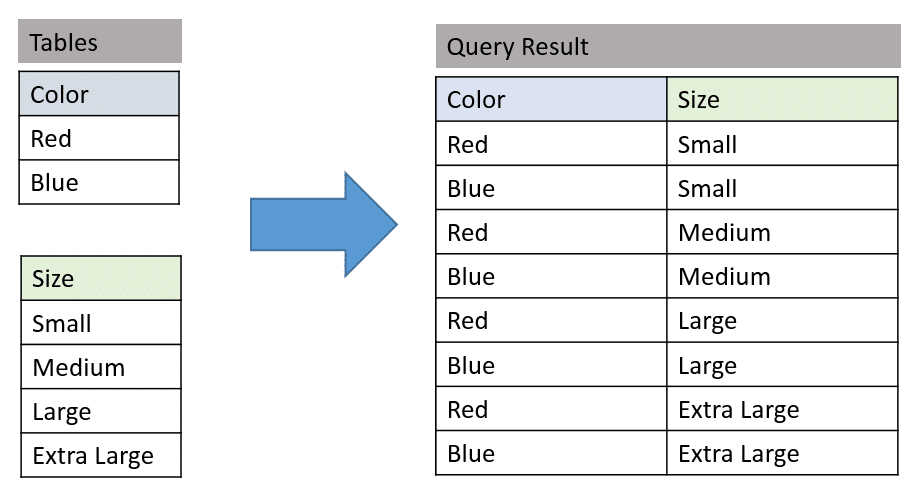

In [ ]:
cur.execute("SELECt * FROM patients_info CROSS JOIN medications_info")
records = cur.fetchall()
for row in records:
  print(row)

(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', '1946-01-11T11:40:19Z', '', 17, 1049630, 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 8016.8, '')
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', '2010-01-20T00:48:18Z', '2010-10-20T00:48:18Z', 17, 314076, 'lisinopril 10 MG Oral Tablet', 5.46, 59621000)
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', '2010-02-19T00:48:18Z', '2010-10-20T00:48:18Z', 27, 310798, 'Hydrochlorothiazide 25 MG Oral Tablet', 0.08, 59621000)
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', '2010-04-20T00:48:18Z', '2010-10-20T00:48:18Z', 123, 308136, 'amLODIPine 2.5 MG Oral Tablet', 3.66, 59621000)
(17, '1959-05-31', 'Karl184', 'Stroman', 'M', 'M', 1500.0, 'Stroman228@sqlite.net', 'USA', '2010-10-20T00:48:18Z', '2010-12-15T00:48:18Z', 123, 310798, 'Hydrochlorothiazide 25 MG Oral Tablet', 0.01

## Drop Table
```
DROP TABLE table_name

```

In [ ]:
cur.execute("DROP TABLE IF EXISTS proc_info")

In [ ]:
# list of tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('patients_info',), ('medications_info',)]


## Index
https://www.sqlitetutorial.net/sqlite-index/


# Exercise 6


### Create Index
Indexes are powerfull tools to speed up querys. They are placed over columns which are often used for searches (where statements)
```
CREATE [UNIQUE] INDEX index_name 
ON table_name(column_list);
```

In [ ]:
# Create an index of the column EMAIL in the patients_info table
sqlEx6 = "CREATE UNIQUE INDEX idx_email ON patients_info (EMAIL)" #<- insert your SQL statement here between the "" signs
cur.execute(sqlEx6)
cur.fetchall()

[]

In [ ]:
# multicolumn Index
cur.execute("CREATE INDEX idx_contacts_name ON patients_info (FIRST, LAST)")
cur.fetchall()

[]

If you query the patients_info table with one of the following conditions in the WHERE clause, SQLite will utilize the multicolumn index to search for data.
```
WHERE
	FIRST = 'John';

WHERE
	LAST = 'John';

WHERE
	FIRST = 'John' AND LAST = 'smith';

WHERE
	FIRST = 'John' OR LAST = 'smith' ;      

```

### Show Indexes
```
PRAGMA index_list('table_name');

```

In [ ]:
# show list indexes created for a table
cur.execute("PRAGMA index_list(patients_info)")
print(cur.fetchall())

[(0, 'idx_contacts_name', 0, 'c', 0), (1, 'idx_email', 1, 'c', 0), (2, 'sqlite_autoindex_patients_info_1', 1, 'u', 0)]


In [ ]:
# get the information about the columns in an index
cur.execute("PRAGMA index_info('idx_contacts_name');")
cur.fetchall()

[(0, 2, 'FIRST'), (1, 3, 'LAST')]

In [ ]:
# get all indexes from a database 
cur.execute("select type, name, tbl_name, sql FROM sqlite_master WHERE type='index'")
print(cur.fetchall())

[('index', 'sqlite_autoindex_patients_info_1', 'patients_info', None), ('index', 'idx_email', 'patients_info', 'CREATE UNIQUE INDEX idx_email ON patients_info (EMAIL)'), ('index', 'idx_contacts_name', 'patients_info', 'CREATE INDEX idx_contacts_name ON patients_info (FIRST, LAST)')]


### Drop Index
```
DROP INDEX [IF EXISTS] index_name;

```

In [ ]:
# Drop index
cur.execute("DROP INDEX idx_email")
cur.execute("PRAGMA index_list(patients_info)")
print(cur.fetchall())

[(0, 'idx_contacts_name', 0, 'c', 0), (1, 'sqlite_autoindex_patients_info_1', 1, 'u', 0)]


## Execute multiple queries


In [ ]:
# Execute whole SQL code in one step
cur.executescript("""
        DROP TABLE IF EXISTS patient_table;
        CREATE TABLE patient_table(patient_id INT, name TEXT, diagnose Text, birthdate datetime);
        INSERT INTO patient_table VALUES(10, 'name1', 'Asthma', '2006-02-28');
        INSERT INTO patient_table VALUES(20, 'name1', 'Asthma', '2007-02-28');
        INSERT INTO patient_table VALUES(30, 'name1', 'Asthma', '2008-02-28');
        INSERT INTO patient_table VALUES(40, 'name1', 'Asthma', '2009-02-28');
        DELETE FROM patient_table WHERE patient_id > 30;
     """)
conn.commit()
# cur.execute("DELETE FROM SqliteDb_developers WHERE id < 3")
cur.execute("SELECT COUNT(patient_id) FROM patient_table")
cur.fetchall()


[(3,)]

# Links

There are more information in:
* https://www.tutorialspoint.com/python_data_access/python_sqlite_insert_data.htm
* https://www.tutorialspoint.com/sqlite
* https://www.w3schools.com/sql/sql_syntax.asp
* https://www.tutorialspoint.com/sql/sql-constraints.htm
* http://zetcode.com/db/sqlitepythontutorial/

* https://pynative.com/python-sqlite/

* https://stackoverflow.com/questions/228912/sqlite-parameter-substitution-problem